# Integração Numérica

Em cálculo I aprendemos que
$$ \int_a^b f(x)\mbox{d}x = F(b) - F(a), $$
se $f$ for uma função integrável, e onde $F$ é uma primitiva de $f$.

No entanto, nem sempre é fácil encontrar uma primitiva para $F$.
Às vezes, pode ser impossível, como em
$$ \int_a^b e^{-x^2}\mbox{d}x. $$

Por sorte, muitas vezes uma aproximação numérica é suficiente para nosso objetivo.

Vamos estudar alguns métodos de aproximação numérica, a maior parte deles usando valores da
função $f$ em pontos selecionados, isto é
$$ \int_a^bf(x)\mbox{d}x = \sum_{i=1}^m A_if(x_i), $$
para uma quantidade de pontos $m$, pontos $x_i$ e valores $A_i$.

Salvo indicação contrária, iremos supor que $x_1 < x_2 < \dots < x_m$.

## Fórmulas de Newton-Cotes

As fórmulas de Newton-Cotes provém da **interpolação polinomial da função $f$** em pontos igualmente espaços do
intervalo $[a,b]$. Se os intervalos estiverem entre os pontos escolhidos, isto é, se $x_1 = a$ e
$x_m = b$, então a fórmula é dita **fechada**. Caso contrário, aberta.

Uma interpolação polinomial da função $f$ nos pontos $x_1, \dots, x_m$, é uma função polinomial $p$ que satisfaz $p(x_i) = f(x_i)$, para $i = 1,\dots,m$.

As fórmulas de Newton-Cotes fechadas terão os pontos $x_i$ descritos por
$$ x_i = a + (i-1)h, $$
onde $h = \dfrac{b-a}{m-1}$.

In [1]:
using Plots
pyplot(size=(400,300))

  likely near In[1]:68


Plots.PyPlotBackend()

In [2]:
a = 1.0
b = 3.0
m = 10
h = (b - a) / (m - 1)

0.2222222222222222

In [3]:
collect(linspace(a, b, m))

10-element Array{Float64,1}:
 1.0    
 1.22222
 1.44444
 1.66667
 1.88889
 2.11111
 2.33333
 2.55556
 2.77778
 3.0    


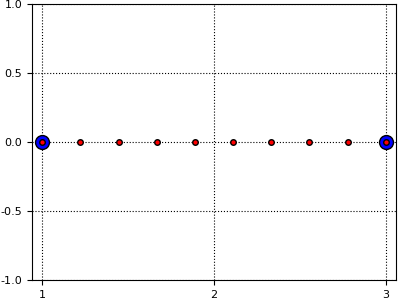

In [4]:
scatter([a; b], zeros(2), c=:blue, ms=10, leg=false)
scatter!(linspace(a, b, m), zeros(m), c=:red)
ylims!(-1, 1)

No caso das fórmula abertas, o espaçamento entre os pontos é $h$, mas começamos a contar depois de $a$ e paramos antes de $b$. Desse modo, podemos pensar que o espaçamento é $h$ no intervalo fechado $[a + h, b - h]$.
De modo que
$$ h = \frac{b - h - (a + h)}{m - 1}. $$

Resolvendo essa equação para encontrar $h$, obtemos
$$ h = \frac{b - a}{m+1}. $$

In [5]:
a = 1.0
b = 3.0
m = 10
h = (b - a) / (m + 1)

0.18181818181818182

In [6]:
collect(linspace(a+h, b-h, m))

10-element Array{Float64,1}:
 1.18182
 1.36364
 1.54545
 1.72727
 1.90909
 2.09091
 2.27273
 2.45455
 2.63636
 2.81818


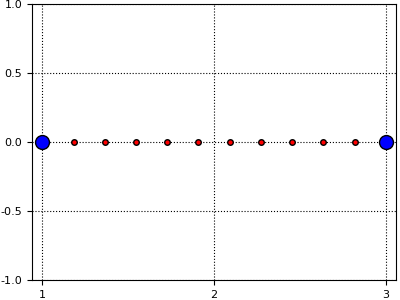

In [7]:
scatter([a; b], zeros(2), c=:blue, ms=10, leg=false)
scatter!(linspace(a+h, b-h, m), zeros(m), c=:red)
ylims!(-1, 1)

### Ponto-Médio

Vamos começar considerando uma simples aproximação para $f$: uma interpolação de um ponto.
$$ p(x) = f\bigg(\frac{a+b}{2}\bigg), $$
isto é, $p$ é uma função constante. Essa aproximação resulta em
$$ \int_a^b f(x)\mbox{d}x \approx \int_a^bf((a+b)/2)\mbox{d}x = (b-a)f\bigg(\frac{a+b}{2}\bigg). $$

Essa aproximação é chamada de regra do **ponto-médio**, e é uma fórmula aberta. Note que não é possível uma fórmula fechada de um ponto, por motivos óbvios.

Note que, como $[a,b]$ foi divido em dois, temos $h = (b-a)/2$. Daí, podemos escrever
$$ \int_a^b f(x)\mbox{d}x \approx 2h f(x_1). $$


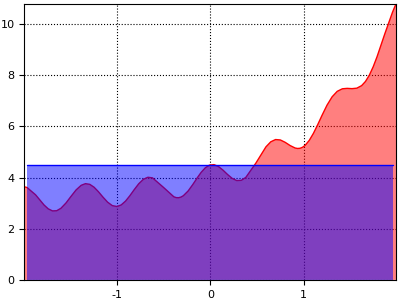

In [8]:
f(x) = exp(x) + cos(3π*x) * 0.5 + 3
F(x) = exp(x) + sin(3π*x)/6π + 3x
a, b = -2, 2
plot(f, a, b, c=:red, fill=(0,:red,0.5), leg=false)
plot!(x->f((a+b)/2), a, b, c=:blue, fill=(0,:blue,0.5))

In [9]:
function ponto_medio(f, a, b)
    return (b-a)*f((a+b)/2)
end

ponto_medio (generic function with 1 method)

In [10]:
ponto_medio(f, a, b) - (F(b)-F(a))

-1.253720815694038

### Trapézio

A fórmula de trapézio é uma fórmula de dois pontos. Note que dado dois pontos distintos, temos uma reta. Pensando na integral como a área abaixo dessa reta, vemos que a área será a área de um trapézio. Daí, o nome.

Para o caso fechado, os dois pontos no intervalo $[a,b]$ serão $x_1 = a$ e $x_2 = b$.

Para o caso aberto, os dois pontos no intervalo $[a,b]$ serão $x = \frac{2a + b}{3}$


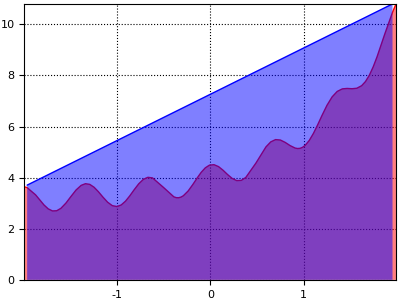

In [11]:
f(x) = exp(x) + cos(3π*x) * 0.5 + 3
F(x) = exp(x) + sin(3π*x)/6π + 3x
a, b = -2, 2
plot(f, a, b, c=:red, fill=(0,:red,0.5), leg=false)
plot!(x->f(a) + (x-a)*(f(b)-f(a))/(b-a), a, b, c=:blue, fill=(0,:blue,0.5))


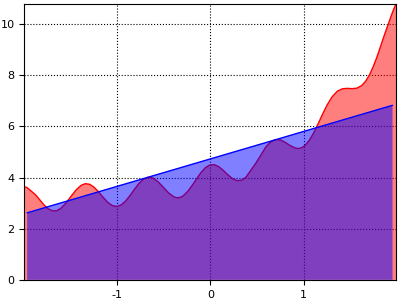

In [12]:
plot(f, a, b, c=:red, fill=(0,:red,0.5), leg=false)
x1, x2 = (2a+b)/3, (a+2b)/3
plot!(x->f(x1) + (x-x1)*(f(x2)-f(x1))/(x2-x1), a, b, c=:blue, fill=(0,:blue,0.5))

A reta que usamos para aproximar a integral é dada por
$$ p(x) = f(x_1) + (x-x_1)\frac{f(x_2)-f(x_1)}{x_2-x_1}, $$
onde $x_1 = a$ e $x_2 = b$ no caso fechado, ou $x_1 = \dfrac{2a+b}{3}$ e $x_2 = \dfrac{a + 2b}{3}$.

Em ambos os casos, teremos
$$ \int_a^b f(x)\mbox{d}x \approx
\frac{b-a}{2}[f(x_1) + f(x_2)].
$$

No entanto, além de $x_1$ e $x_2$ serem diferentes, temos também o valor de $h$.
Para o caso fechado, temos $h = b-a$. Daí,
$$ \int_a^b f(x)\mbox{d}x \approx \frac{h}{2}[f(x_1) + f(x_2)]. $$
Para o caso aberto, temos $h = \frac{b-a}{3}$. Logo,
$$ \int_a^b f(x)\mbox{d}x \approx \frac{3h}{2}[f(x_1) + f(x_2)]. $$

In [13]:
function trapezio_fechado(f, a, b)
    return (b-a)*(f(a)+f(b))/2
end

function trapezio_aberto(f, a, b)
    h = (b-a)/3
    return (b-a)*(f(a+h)+f(b-h))/2
end

trapezio_aberto (generic function with 1 method)

In [14]:
trapezio_fechado(f, a, b) - (F(b)-F(a))

9.795061948640488

In [15]:
trapezio_aberto(f, a, b) - (F(b)-F(a))

-0.3314184955195003

## Erro

Uma pergunta importante aqui é quão errada é essa aproximação.
Note que, diferente do método de Newton ou da bissecção, não estamos calculando aproximações sucessivas para a integral, e sim uma única aproximação, que esperamos ser boa o suficiente.

O cálculo da fórmula do erro envolve outros conceitos não estudados nesta disciplina.
Iremos apenas apresentar os erros, começando pelas três aproximações que vimos.

Abaixo, $\xi$ é algum número em $[a,b]$ ou $(a,b)$, se a função for fechada ou aberta, respectivamente.

- Ponto médio
$$ \int_a^b f(x)\mbox{d}x = 2hf(x_1) + \frac{h^3}{3}f''(\xi)
= (b-a) f\bigg(\frac{b-a}{2}\bigg) + \frac{(b-a)^3}{24}f''(\xi); $$
- Trapézio fechado
$$ \int_a^b f(x)\mbox{d}x = \frac{h}{2}[f(x_1) + f(x_2)] - \frac{h^3}{12}f''(\xi)
= \frac{b-a}{2}[f(a) + f(b)] - \frac{(b-a)^3}{12}f''(\xi); $$
- Trapézio aberto
$$ \int_a^b f(x)\mbox{d}x = \frac{3h}{2}[f(x_1) + f(x_2)] + \frac{3h^3}{4}f''(\xi)
= \frac{b-a}{2}[f\bigg(\frac{2a+b}{3}\bigg) + f\bigg(\frac{a+2b}{3}\bigg)] - \frac{(b-a)^3}{36}f''(\xi). $$

As três aproximações compartilham uma mesma propriedade. O erro é da ordem de $h^3 f''(\xi)$.
Isso quer dizer que para valores pequenos de $h$, o erro diminui cubicamente. Note que o $\xi$ para cada aproximação pode ser diferente.


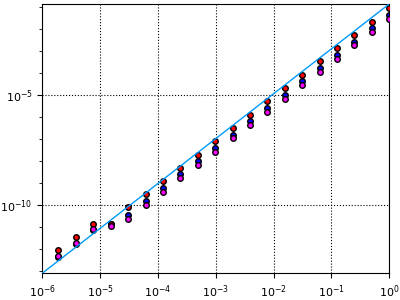

In [16]:
a = 0
f(x) = exp(x)
F(x) = exp(x)
cores = [:blue, :red, :magenta]
scatter(leg=false, xaxis=:log, yaxis=:log)
for (i,mtd) in enumerate([ponto_medio, trapezio_fechado, trapezio_aberto])
    b = 1.0
    while b > 1e-6
        Ireal = F(b) - F(a)
        Iapprox = mtd(f, a, b)
        E = abs(Ireal - Iapprox) / Ireal
        scatter!([b], [E], c=cores[i])
        b /= 2.0
    end
end
b = [1.0; 1e-6]
plot!(b, b.^3 .* exp.(b) ./ (F.(b) - F(a)) / 12)

Duas conclusões importantes podem ser tiradas daqui. Primeiro, não existem bons motivos para se usar o trapézio aberto, uma vez que o erro do ponto médio é da mesma ordem que o do trapézio aberto.
Segundo, que todas essas fórmulas tem uma erro proporcional à $f''(\xi)$, de modo que integram perfeitamente funções afins.

In [17]:
f(x) = 2x + 5
F(x) = x^2 + 5x
a, b = 0, 1
ponto_medio(f, a, b) - (F(b) - F(a))

0.0

Outro ponto agora é se conseguimos melhorar nossa aproximação num intervalo fixo $[a,b]$.
Existem duas possibilidades: aumentar a quantidade de pontos da interpolação, ou quebrar o intervalo $[a,b]$ em vários intervalos menores.

### Regra de Simpson 

Usando 3 pontos chegamos nas seguintes fórmulas:

\begin{align}
\int_a^b f(x)\mbox{d}x & = \frac{b-a}{6}[f(a) + 4f\bigg(\frac{a+b}{2}\bigg) + f(b)] - \frac{(b-a)^5}{2880}f^{(4)}(\xi) \\
& = \frac{h}{3}[f(x_1) + 4f(x_2) + f(x_3)] - \frac{h^5}{90}f^{(4)}(\xi),
\end{align}
e

\begin{align}
\int_a^b f(x)\mbox{d}x & = \frac{b-a}{3}[2f(a+h) - f(a+2h) + 2f(a+3h)] + \frac{7(b - a)^5}{23040}f^{(4)}(\xi) \\
& = \frac{4h}{3}[2f(x_1) - f(x_2) + 2f(x_3)] + \frac{14h^5}{45}f^{(4)}(\xi).
\end{align}

Note que $h = \dfrac{b-a}{2}$ na fórmula fechada e $h = \dfrac{b-a}{4}$ na fórmula aberta.

A fórmula fechada de 3 pontos é chamado de regra de Simpson.


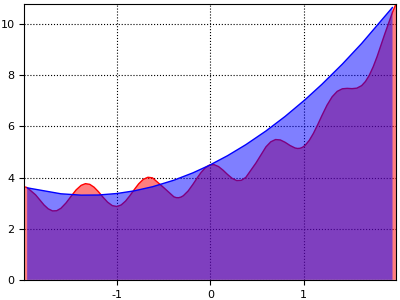

In [18]:
f(x) = exp(x) + cos(3π*x) * 0.5 + 3
a, b = -2, 2
c = (a+b)/2
interp(x) = f(a) + (x - a) * (f(c) - f(a)) / (c - a) + (x - a) * (x - c) * (f(b) - 2*f(c) + f(a)) / (2 * (c - a)^2)
plot(f, a, b, c=:red, fill=(0,:red,0.5), leg=false)
plot!(interp, a, b, c=:blue, fill=(0,:blue,0.5))

In [19]:
function simpson(f, a, b)
    # Implemente
end

simpson (generic function with 1 method)

In [20]:
function aberta3pontos(f, a, b)
    # Implemente
end

aberta3pontos (generic function with 1 method)

In [21]:
a = 0.0
f(x) = exp(x)
F(x) = exp(x)
cores = [:blue, :red, :magenta]
scatter(leg=false, xaxis=:log, yaxis=:log)
for (i,mtd) in enumerate([simpson, aberta3pontos])
    b = 1.0
    while b > 1e-6
        Ireal = F(b) - F(a)
        Iapprox = mtd(f, a, b)
        E = abs(Ireal - Iapprox) / Ireal
        scatter!([b], [E], c=cores[i])
        b /= 2.0
    end
end
b = [1.0; 1e-6]
plot!(b, b.^5 .* exp.(b) ./ (F.(b) - F(a)) / 2880)

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

As fórmulas com 3 pontos, como esperávamos, são melhores que as de 2 ou 1 pontos. O erro também passou a ser proporcional a $f^{(4)}(\xi)$, de modo que podemos calcular a integral exata de polinômios até grau 3.

In [22]:
f(x) = x^3 + x^2 + x + 1
F(x) = x^4/4 + x^3/3 + x^2/2 + x
a, b = 0, 1
simpson(f, a, b) - (F(b) - F(a))

LoadError: [91mMethodError: no method matching -(::Void, ::Float64)[0m
Closest candidates are:
  -([91m::Float64[39m, ::Float64) at float.jl:377
  -([91m::Complex{Bool}[39m, ::Real) at complex.jl:253
  -([91m::BigFloat[39m, ::Union{Float16, Float32, Float64}) at mpfr.jl:351
  ...[39m

No entanto, quando passamos para 4 pontos, não temos a mesma sorte. Assim como a transição do ponto-médio ao trapézio aberto, não temos melhoria na ordem de convergência da aproximação, nem para a fórmula fechada nem para a fórmula aberta. Esse fenômeno se repete, de modo que criar interpolações com cada vez mais pontos se torna tanto inviável quanto ineficaz.

## Composição de aproximações (ou repetição)



A outra estratégia para melhorar a aproximação no cálculo da integral é quebrando o intervalo em pedaços menores e aproximando cada pedaço.

Em outras palavras, transformamos o intervalo em
$a = x_1 < x_2 < \dots < x_m = b$, com $x_{i+1} - x_i = h = \frac{b-a}{m-1}$ no caso fechado e em
$a = x_0 < x_1 < x_2 < \dots < x_m < x_{m+1} = b$, com $x_{i+1} - x_i = h = \frac{b-a}{m+1}$ no caso aberto.

Note que no caso aberto criamos dois pontos extras $x_0 = a$ e $x_{m+1} = b$, para deixar mais simples o entendimento.

Com os intervalos separados, utilizamos as fórmulas dos métodos "encaixando" os pontos da fórmula na discretização que fizemos.

O exemplo mais fácil de entender é o da regra do trapézio.
Veja abaixo, onde quebramos o intervalo $[-2,2]$ em 4 intervalos (i.e., $m = 5$).


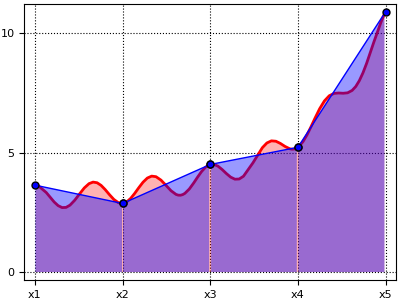

In [23]:
f(x) = exp(x) + cos(3π*x) * 0.5 + 3
a, b = -2, 2
p = plot(f, a, b, c=:red, lw=2, fill=(0,:red,0.3), leg=false)
m = 5
h = (b - a) / (m - 1)

for i = 1:m-1
    xi = a + (i-1) * h
    xip = xi + h
    L(x) = f(xi) + (x-xi) * (f(xip) - f(xi)) / h    
    plot!(p, L, xi, xip, c=:blue, fill=(0,:blue,0.4))
    scatter!([xi; xip], [f(xi); f(xip)], c=:blue, ms=5)
end
xticks!(a:h:b, ["x$i" for i = 1:m])
p

Na teoria, temos agora

\begin{align}
\int_a^b f(x)\mbox{d}x
& = \int_{x_1}^{x_4} f(x)\mbox{d}x \\
& = \int_{x_1}^{x_2} f(x)\mbox{d}x +
\int_{x_2}^{x_3} f(x)\mbox{d}x +
\int_{x_3}^{x_4} f(x)\mbox{d}x \\
& = \frac{x_2 - x_1}{2}[f(x_1) + f(x_2)]
- \frac{(x_2 - x_1)^3}{12}f''(\xi_1) \\
& + \frac{x_3 - x_2}{2}[f(x_2) + f(x_3)]
- \frac{(x_3 - x_2)^3}{12}f''(\xi_2) \\
& + \frac{x_4 - x_3}{2}[f(x_3) + f(x_4)]
- \frac{(x_4 - x_3)^3}{12}f''(\xi_3) \\
& = \frac{h}{2}[f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)] - \frac{h^3}{12}[f''(\xi_1) + f''(\xi_2) + f''(\xi_3)],
\end{align}

onde $\xi_i$ está no intervalo $[x_i,x_{i+1}]$.

O erro dessa aproximação continua sendo apenas $h^3$, apesar de usarmos 4 pontos. Porém, a escolha do $h$ é arbitrário, de modo que podemos escolher um $h$ pequeno o suficiente para satisfazer nossas necessidades.

De uma maneira mais geral, temos
$$ \int_a^b f(x)\mbox{d}x = \frac{h}{2}[f(x_1) + 2\sum_{i = 2}^{m-1}f(x_i) + f(x_m)] - \frac{h^3}{12}\sum_{i=1}^{m-1}f''(\xi_i).
$$

A seguir uma implementação básica desse método.

In [24]:
function trapezio_composto(f, a, b; m = 10) # Note que não faremos mais o trapézio aberto.
    h = (b - a) / (m - 1)
    I = 0.0
    xi = a
    for i = 2:m-1
        xi += h
        I += f(xi)
    end
    I = f(a) + 2I + f(b)
    return I * h / 2
end

trapezio_composto (generic function with 1 method)

In [25]:
f(x) = log(x)
F(x) = x * log(x) - x
a, b = 1, e
println("∫f(x)dx = $(F(b) - F(a))")
for m = 10:10:100
    Ia = trapezio_composto(f, a, b, m=m)
    Ir = F(b) - F(a)
    E = abs(Ir - Ia) / abs(Ir)
    println("∫f(x)dx ≈ $Ia, Erro Relativo = $E")
end

∫f(x)dx = 1.0
∫f(x)dx ≈ 0.9980833759447165, Erro Relativo = 0.001916624055283478
∫f(x)dx ≈ 0.9995693517566672, Erro Relativo = 0.0004306482433328318
∫f(x)dx ≈ 0.9998151007522933, Erro Relativo = 0.00018489924770670463
∫f(x)dx ≈ 0.9998977564240852, Erro Relativo = 0.0001022435759148177
∫f(x)dx ≈ 0.9999352278141773, Erro Relativo = 6.47721858226813e-5
∫f(x)dx ≈ 0.9999553228987321, Erro Relativo = 4.467710126787594e-5
∫f(x)dx ≈ 0.9999673340126418, Erro Relativo = 3.266598735818249e-5
∫f(x)dx ≈ 0.9999750802897797, Erro Relativo = 2.491971022033912e-5
∫f(x)dx ≈ 0.9999803655228862, Erro Relativo = 1.9634477113839033e-5
∫f(x)dx ≈ 0.9999841316957123, Erro Relativo = 1.58683042876806e-5


Agora vejamos a regra do ponto médio. Note que não queremos os extremos do intervalo, e além disso, calculamos $f$ no ponto médio. Isso quer dizer que, na prática, existem 3 pontos envolvidos, apesar do cálculo da $f$ apenas em um deles. Isso quer dizer que separamos o intervalo $[a,b]$ de dois em dois pontos.

Lembrando que, neste caso, mudamos a definição dos pontos para
$h = \dfrac{b - a}{m + 1}$ e $x_0 = a$ e $x_{m+1} = b$.

Por exemplo, usando $m = 5$,

\begin{align}
\int_a^b f(x)\mbox{d}x & = \int_{x_0}^{x_6} f(x)\mbox{d}x \\
& = \int_{x_0}^{x_2} f(x)\mbox{d}x
+ \int_{x_2}^{x_4} f(x)\mbox{d}x
+ \int_{x_4}^{x_6} f(x)\mbox{d}x \\
& = (x_2 - x_0)f(x_1) + \frac{(x_2-x_0)^3}{24}f''(\xi_1)
+ (x_4 - x_2)f(x_3) + \frac{(x_4-x_2)^3}{24}f''(\xi_2) \\
& \quad + (x_6 - x_4)f(x_5) + \frac{(x_6-x_4)^3}{24}f''(\xi_3) \\
& = 2h[f(x_1) + f(x_3) + f(x_5)] + \frac{h^3}{3}[f''(\xi_1) + f''(\xi_2) + f''(\xi_3)].
\end{align}

Pode parecer estranho pular tantos pontos, e ainda o fato do intervalo mudar, mas graficamente isso fica mais claro.


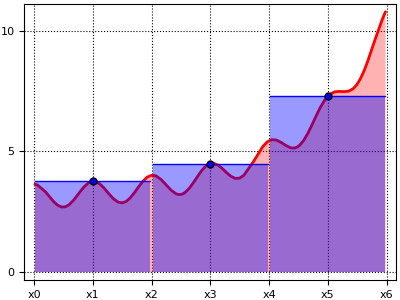

In [26]:
f(x) = exp(x) + cos(3π*x) * 0.5 + 3
a, b = -2, 2
p = plot(f, a, b, c=:red, lw=2, fill=(0,:red,0.3), leg=false)
m = 5
h = (b - a) / (m + 1)

for i = 1:2:m
    xi = a + i * h
    plot!(p, x->f(xi), xi - h, xi + h, c=:blue, fill=(0,:blue,0.4))
    scatter!([xi], [f(xi)], ms=5, c=:blue)
end
xticks!(a:h:b, ["x$i" for i = 0:m+1])
p

De uma maneira mais geral, temos
$$ \int_a^b f(x)\mbox{d}x = 2h\sum_{i = 1}^{(m+1)/2}f(x_{2i}) + \frac{h^3}{3}\sum_{i=1}^{(m+1)/2}f''(\xi_i).
$$

Assumimos $m$ ímpar.

A implementação está abaixo.

In [27]:
function ponto_medio_composto(f, a, b; m = 10)
    I = 0.0
    if m%2 == 0 # Se m não for ímpar, usamos m + 1
        m += 1
    end
    h = (b - a) / (m + 1)
    xi = a + h
    for i = 1:2:m
        I += f(xi)
        xi += 2h
    end
    return I * 2 * h
end

ponto_medio_composto (generic function with 1 method)

In [28]:
f(x) = log(x)
F(x) = x * log(x) - x
a, b = 1, e
Ir = F(b) - F(a)
println("∫f(x)dx = $Ir")
for m = 10:10:100
    Ia = ponto_medio_composto(f, a, b, m=m)
    E = abs(Ir - Ia) / abs(Ir)
    println("∫f(x)dx ≈ $Ia, Erro Relativo = $E")
end

∫f(x)dx = 1.0
∫f(x)dx ≈ 1.0021449681894743, Erro Relativo = 0.0021449681894742945
∫f(x)dx ≈ 1.0006413118189519, Erro Relativo = 0.000641311818951884
∫f(x)dx ≈ 1.0003034587984303, Erro Relativo = 0.00030345879843030055
∫f(x)dx ≈ 1.0001762318521485, Erro Relativo = 0.0001762318521485451
∫f(x)dx ≈ 1.0001149912122405, Erro Relativo = 0.00011499121224045616
∫f(x)dx ≈ 1.0000808978878688, Erro Relativo = 8.08978878688027e-5
∫f(x)dx ≈ 1.0000599909536767, Erro Relativo = 5.999095367670293e-5
∫f(x)dx ≈ 1.000046253318927, Erro Relativo = 4.6253318926936515e-5
∫f(x)dx ≈ 1.0000367458831187, Erro Relativo = 3.674588311874949e-5
∫f(x)dx ≈ 1.0000298946794866, Erro Relativo = 2.989467948655289e-5


### Erro das compostas

Vejamos o que acontece agora com o erro das aproximações compostas.

Para o ponto médio, temos
$$ E^{(m)}_{PM} = \int_a^b f(x)\mbox{d}x - 2h\sum_{i = 1}^{(m+1)/2}f(x_{2i})
= \frac{h^3}{3}\sum_{i=1}^{(m+1)/2}f''(\xi_i).
$$

Agora é importante notar que $\xi_i \in [x_{2i-1},x_{2i+1}] \subset [a,b]$.
Então, pelo Teorema do Valor Extremo aplicado à função $f''$, temos
$$ \min_{x \in [a,b]} f''(x) \leq f''(\xi_i) \leq \max_{x \in [a,b]} f''(x). $$

Aplicando o somatório,

$$ \frac{m+1}{2}\min_{x \in [a,b]} f''(x) \leq \sum_{i=1}^{(m+1)/2} f''(\xi_i)
\leq \frac{m+1}{2}\max_{x \in [a,b]} f''(x), $$

que vira
$$ \min_{x \in [a,b]} f''(x) \leq \frac{2}{m+1} \sum_{i=1}^{(m+1)/2}f''(\xi_i) \leq \max_{x \in [a,b]} f''(x). $$

Pelo Teorema do Valor Intermediário, existe $\mu \in [a,b]$ tal que
$$ \frac{2}{m+1} \sum_{i=1}^{(m+1)/2} f''(\xi_i) = f''(\mu). $$

Assim,
$$ E^{(m)}_{PM} = \frac{h^3}{3}\frac{m+1}{2}f''(\mu). $$
Como $h = \dfrac{b-a}{m+1}$, podemos escrever também
$$ E^{(m)}_{PM} = \frac{h^2(b-a)}{6}f''(\mu)
= \frac{(b-a)^3}{6(m+1)^2}f''(\mu).
$$

Para o método do Trapézio,
$$ E_{TR}^{(m)} = \int_a^b f(x)\mbox{d}x - \frac{h}{2}[f(x_1) + 2\sum_{i = 2}^{m-1}f(x_i) + f(x_m)] = - \frac{h^3}{12}\sum_{i=1}^{m-1}f''(\xi_i).
$$
Por argumentos similares,
$$ E_{TR}^{(m)} = - \frac{h^3}{12}\frac{1}{m-1}f''(\mu)
= -\frac{h^2(b-a)}{12}f''(\mu)
= -\frac{(b-a)^3}{12(m-1)^2}f''(\mu).$$


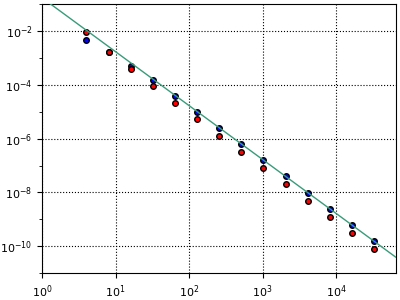

In [29]:
f(x) = exp(x)
F(x) = exp(x)
a, b = 0, 1
cores = [:blue, :red, :magenta]
p = scatter(leg=false, xaxis=:log, yaxis=:log)
Ireal = F(b) - F(a)
for (i,mtd) in enumerate([ponto_medio_composto, trapezio_composto])
    for m = 2.^(2:15)b
        Iapprox = mtd(f, a, b, m=m)
        E = abs(Ireal - Iapprox) / Ireal
        scatter!(p, [m], [E], c=cores[i])
    end
end
n = [1; 2^16]
plot!(n, (1 ./ n).^2 / 6)
xlims!(1.0, 2^16)
ylims!(1e-11, 1e-1)

Com esse erro em mãos, podemos calcular limitantes para o erro cometido por uma aproximação sabendo a função.
Por exemplo,
na integração da função $f(x) = e^x$, com $m = 100$, de $0$ a $1$, os erros exatos serão
$$ E_{PM} = \frac{(b-a)^3}{6(m+1)^2}f''(\mu) = \frac{(1-0)^3}{6\times101^2}e^{\mu} = \frac{e^{\mu}}{61206},$$
e
$$ E_{TR} = -\frac{(b-a)^3}{12(m-1)^2}f''(\mu) = -\frac{(1-0)^3}{12\times99^2}e^{\mu} = -\frac{e^{\mu}}{117612}. $$

Esse valor depende de $\mu \in [0,1]$, e é desconhecido. Porém, podemos limitar esse erro, usando um limitante para $|f''(\mu)|$. No caso desta função $f$, neste intervalo, temos $e^\mu \leq e^1 = e$. Daí,

$$ |E_{PM}| \leq \frac{e}{61206} \approx 4.44\times10^{-5}, $$
e
$$ |E_{TR}| \leq \frac{e}{117612} \approx 2.31\times10^{-5}. $$

De fato, aplicando o método temos

In [30]:
f(x) = exp(x)
F(x) = exp(x)
a, b = 0, 1
Ir = F(b) - F(a)
println("E_PM = $(Ir - ponto_medio_composto(f, a, b, m=100))")
println("E_TR = $(Ir - trapezio_composto(f, a, b, m=100))")

E_PM = 2.7525672183781325e-5
E_TR = -1.4609724402259161e-5


Isso também nos permite buscar o $m$ ou $h$ que faça com que o erro seja menor que uma certa tolerância.
Por exemplo, para o ponto médio, se quisermos que o erro seja menor que $\varepsilon$, temos que fazer o seguinte.

Primeiro, veja que
$$ |E_{PM}| \leq \frac{h^2(b-a)}{6}M_2, $$
onde $M_2 = \max_{x\in[a,b]}|f''(x)|$.
Daí, basta que o lado direito seja limitado por $\varepsilon$, isto é, que
$$ \frac{h^2(b-a)}{6}M_2 \leq \varepsilon. $$

O $h$ que satisfaz isso é tal que
$$ h \leq \sqrt{  \frac{6\varepsilon}{M_2(b-a)} }. $$

Se quisermos $m$, podemos refazer a conta usando a fórmula com $m$, ou tirar $m$ do resultado, usando $h = \dfrac{b-a}{m+1}$:

$$ m = \frac{b-a}{h} - 1 \geq (b-a)\sqrt{ \frac{M_2(b-a)}{6\varepsilon} } - 1
$$

Por exemplo, se quisermos o erro menor que $\varepsilon = 10^{-7}$, para a mesma função, no mesmo intervalo,
devemos ter

In [31]:
a, b = 0, 1
M2 = exp(b) # Pois exp(x) é crescente
ε = 1e-7
hmax = sqrt(6ε / M2 * (b - a))

0.0004698166288062454

In [32]:
mmin = (b-a)/hmax - 1

2127.4900079865088

In [33]:
# De maneira mais precisa
mmin = ceil(Int, (b-a)/hmax - 1)

2128

In [34]:
ponto_medio_composto(f, 0, 1, m=mmin) - (F(b) - F(a))

-6.312245792727822e-8

### Simpson composta

De maneira similar, podemos fazer a regra de Simpson composta. Note que utilizamos um ponto a mais, de modo que aplicaremos a regra de dois em dois pontos. Note que $m$ deve ser ímpar.

$$ \int_a^b f(x)\mbox{d}x =
\frac{h}{3}[f(x_{1}) +
2\sum_{i = 1}^{(m-1)/2-1}f(x_{2i+1}) +
4\sum_{i = 1}^{(m-1)/2}f(x_{2i}) +
f(x_m)] + E_{SP},
$$
com o erro $E_{SP}$ sendo
$$ E_{SP} = -\frac{(b-a)h^4}{180}f^{(4)}(\mu)
= -\frac{(b-a)^5}{180(m-1)^4}f^{(4)}(\mu). $$

In [35]:
function simpson_composto(f, a, b; m = 101)
    # Implemente
end

simpson_composto (generic function with 1 method)

In [36]:
f(x) = exp(x)
F(x) = exp(x)
a, b = 0, 1
p = scatter(leg=false, xaxis=:log, yaxis=:log)
Ireal = F(b) - F(a)
for m = 2.^(2:15)
    Iapprox = simpson_composto(f, a, b, m=m)
    E = abs(Ireal - Iapprox) / Ireal
    scatter!(p, [m], [E], c=:blue)
end
n = [1; 2^16]
plot!(n, (1 ./ n).^2 / 6)
xlims!(1.0, 2^16)
ylims!(1e-16, 1e-1)

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at /home/abel/.julia/v0.6/PyCall/src/pyoperators.jl:11
  ...[39m

## Exercícios

Exercícios do capítulo 7 do livro Cálculo Numérico de Ruggiero e Lopes.

$\newcommand{\intdefx}[3]{\int_{#1}^{#2}\! {#3}\mbox{d}x}$

1. Calcule aproximações para as seguintes integrais, usando os métodos do ponto
   médio, do trapézio e de Simpson repetidos. Faça com três números de
   intervalos diferentes e compare os resultados.

  - $\displaystyle \intdefx{0}{1}{eˣ}$
  - $\displaystyle \intdefx{0}{1}{1}$
  - $\displaystyle \intdefx{0}{1}{x}$
  - $\displaystyle \intdefx{0}{1}{x^2}$
  - $\displaystyle \intdefx{0}{1}{x^3}$
  - $\displaystyle \intdefx{1}{e}{\log x}$
  - $\displaystyle \intdefx{-10}{10}{\dfrac{1}{x^2+1}}$
  - $\displaystyle \intdefx{-\pi}{\pi}{\sin x}$

2. Para cada integral acima, calcule quantos pontos são necessários para se obter um erro menor que $10^{-6}.

3. Considere a função $f$ contínua no intervalo $[a,b]$,
e a função $p$ dada por
$$ p(x) = f(a) + \alpha (x-a) + \beta (x - a)(x - c), $$
onde $c = \dfrac{a+b}{2}$ é o ponto médio do intervalo $[a,b]$,
$\alpha = \dfrac{f(c) - f(a)}{h}$, e
$\beta = \dfrac{f(b) - 2f(c) + f(a)}{2h^2}$, com
$h = c - a = b - c$.

  - Mostre que $p$ interpola $f$ em 3 pontos: $a, b$ e $c$.
  - Calcule a integral de $p$ de $[a,b]$ e interprete o resultado.